**Opdracht 3**

In [114]:
import pandas as pd   #inladen bibliotheken           
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                  
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
import statsmodels.stats.api as sms    
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.regression as sr
import statsmodels as st 
from scipy import stats

In [115]:
df = pd.read_csv('etmgeg2.csv',sep=',') #Dataset inladen
df_filtered = df[df['Jaar'] >= 1957] #De data vanaf 1957 selecteren
df = df_filtered[2:] #Data vanaf 31-8-1957 selecteren, omdat de twee datums ervoor ontbrekende waarden zijn voor Verdamping
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 170 to 370
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datum             201 non-null    object 
 1   Jaar              201 non-null    int64  
 2   Maand             201 non-null    int64  
 3   Dag               201 non-null    int64  
 4   Staatshoofd       201 non-null    object 
 5   WindrVec          201 non-null    float64
 6   WindrCat9         201 non-null    object 
 7   WindrCat5         201 non-null    object 
 8   Windsnelh         201 non-null    float64
 9   WindsnelhGem      201 non-null    float64
 10  WindsnelhMax      201 non-null    float64
 11  WindsnelhMaxUur   201 non-null    float64
 12  WindsnelhMin      201 non-null    float64
 13  WindsnelhMinUur   201 non-null    float64
 14  Windstoot         201 non-null    float64
 15  WindstootUur      197 non-null    float64
 16  TempGem           201 non-null    float64
 17  

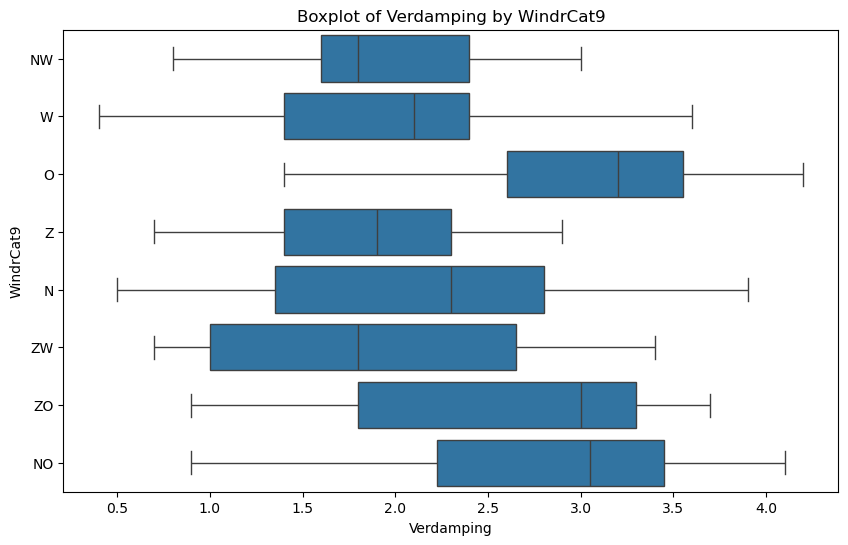

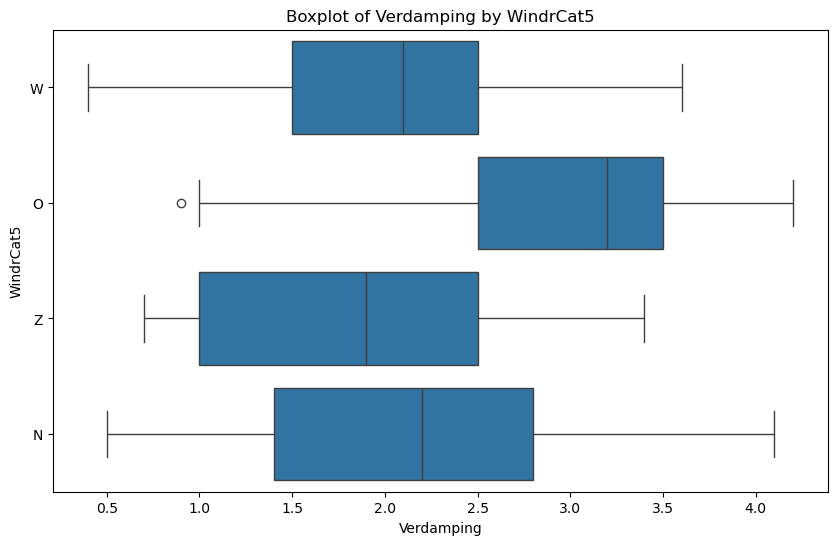

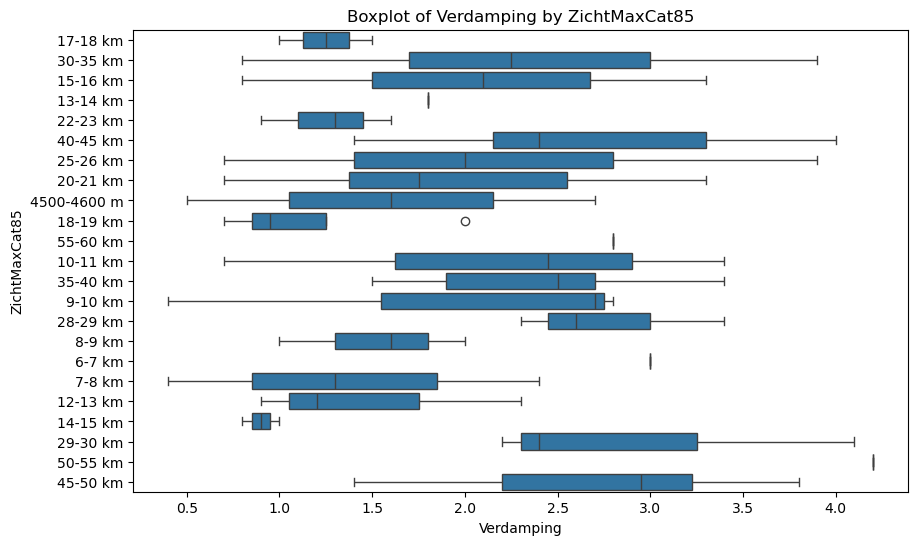

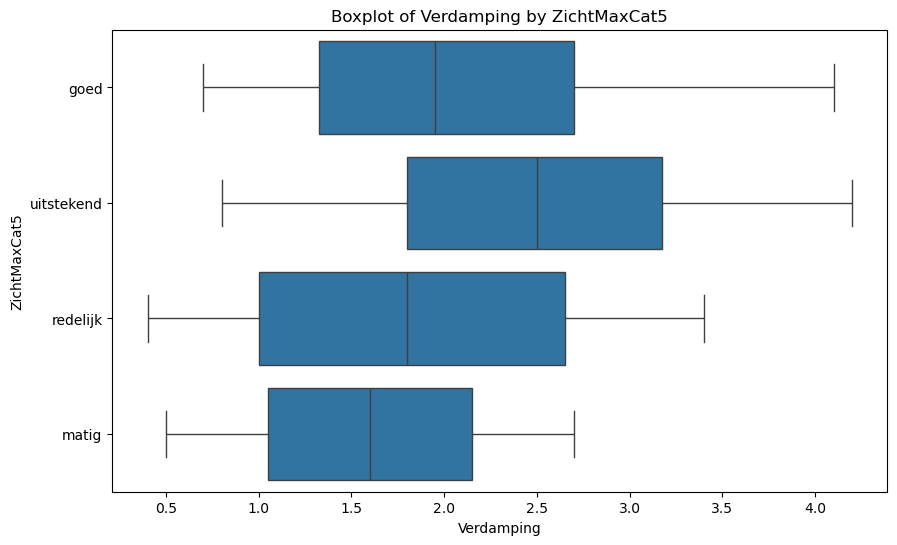

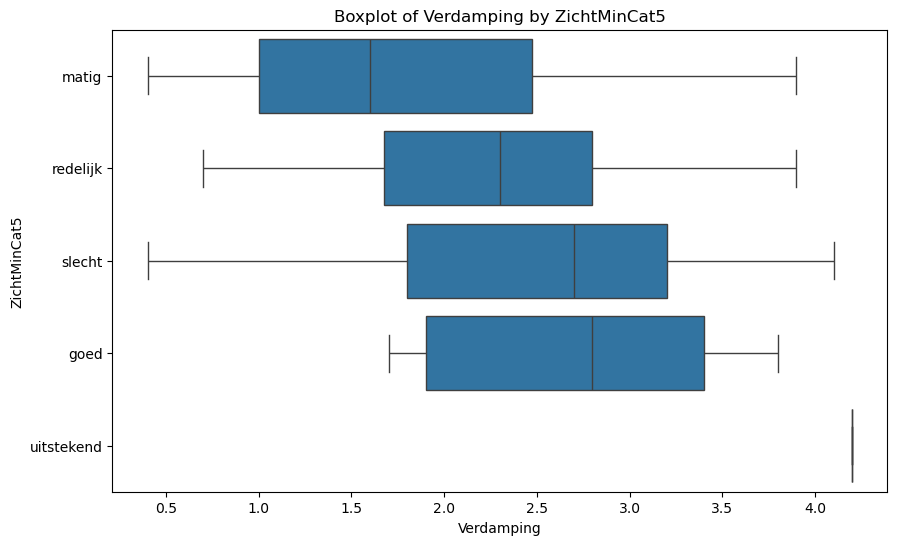

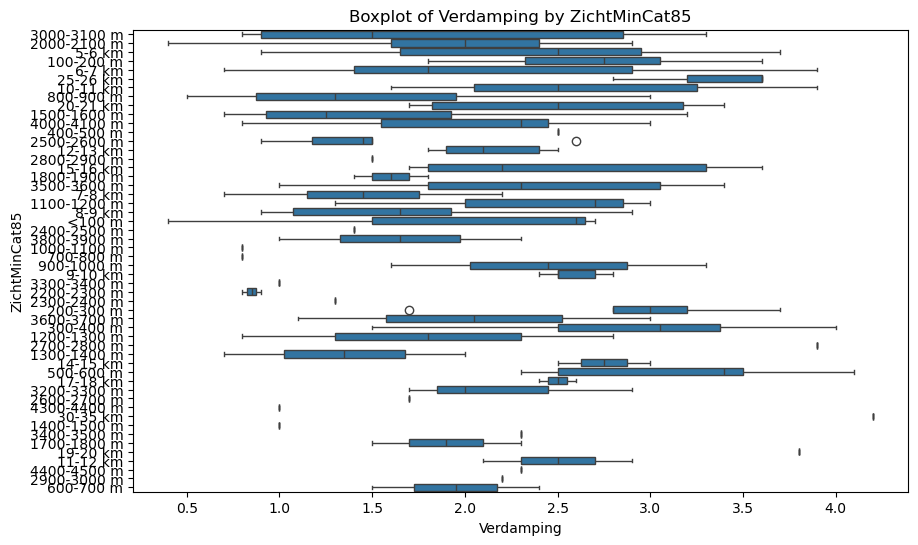

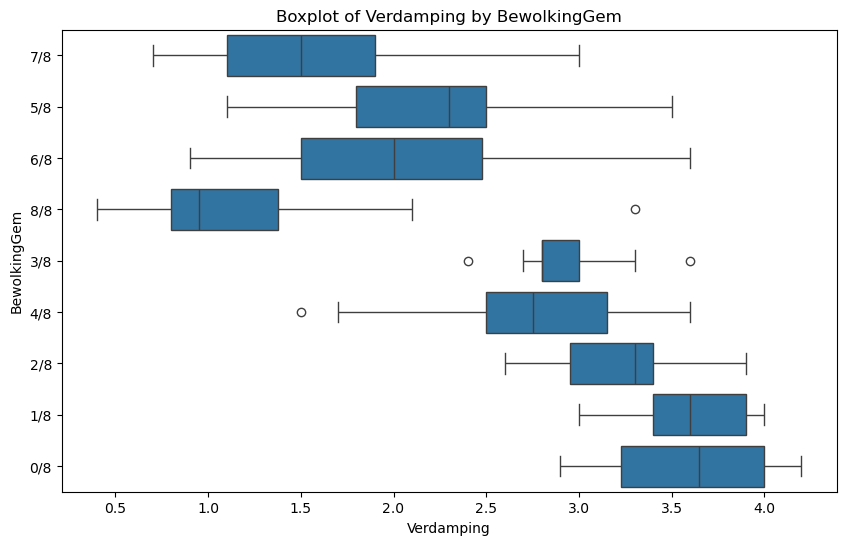

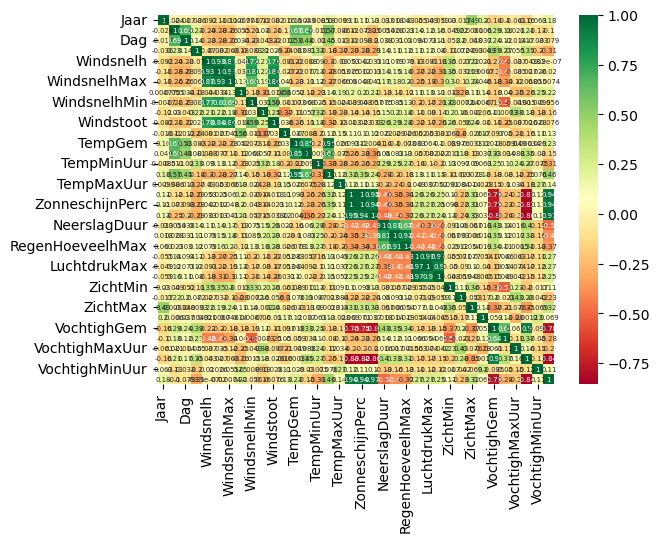

In [116]:
# We hebben boxplots geplot om de verdeling van variabelen per categorie te bekijken.
categ_kolommen = ['WindrCat9', 'WindrCat5', 'ZichtMaxCat85', 'ZichtMaxCat5', 'ZichtMinCat5', 'ZichtMinCat85', 'BewolkingGem'] 
for kolom in categ_kolommen:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Verdamping'], y=df[kolom])
    plt.title(f'Boxplot of Verdamping by {kolom}')
    plt.xlabel('Verdamping')
    plt.ylabel(kolom)
    plt.show()  



# Daarnaast hebben we ook een heatmap  geplot om de correlaties tussen de numerieke variabelen te bekijken.  
# Hierbij is te zien dat de donkergroene en donkerrode de sterkste correlatie hebben. 
heat = sns.heatmap(df.corr(numeric_only = True), cmap="RdYlGn", annot=True, annot_kws={"fontsize": 5})
plt.show()

Bij de boxplotten is te zien dat de categoriën van variabelen klein zijn. Wij hebben ervoor gekozen om categoriën te combineren zodat het de gegevens makkelijker maakt om te begrijpen, patronen te vinden en bij het maken van betere/grotere boxplotten. 

In [117]:
def groep_zichtmax(value):  #Functie om de de kolom ZichtMaxCat85 te groeperen in 4 groepen.
    verschil = int(value.split('-')[0]) 
    if verschil < 20:
        return '0-20 km'
    elif 20 <= verschil < 40:
        return '20-40 km'
    elif 40 <= verschil < 60:
        return '40-60 km' 
    elif 4500 <= verschil < 4600: 
        return '0-20 km' 

df['ZichtMaxCat85_grouped'] = df['ZichtMaxCat85'].apply(groep_zichtmax) #Functie toepassen op de kolom 

# Create a boolean mask for rows where 'ZichtMinCat85' ends with ' m'
Eindigt_op_m = df['ZichtMinCat85'].str.endswith(' m')

# Use the boolean mask to replace the values in the 'ZichtMinCat85' column
df.loc[Eindigt_op_m, 'ZichtMinCat85'] = '0-10 km'

# Define the replacement dictionary for grouping
replacement_dict = {                              
    '5-6 km': '0-10 km',
    '6-7 km': '0-10 km',
    '7-8 km': '0-10 km',
    '8-9 km': '0-10 km',
    '9-10 km': '0-10 km',
    '10-15 km': '10-20 km',
    '15-20 km': '10-20 km',
    '20-25 km': '20-40 km',
    '25-30 km': '20-40 km',
    '30-35 km': '20-40 km'
}

# Apply the replacement dictionary to group the values in 'ZichtMinCat85'
df['ZichtMinCat85_grouped'] = df['ZichtMinCat85'].replace(replacement_dict)
   

klein = []    #Twee lijsten maken voor de kolom BewolkingGem
middel = []

for value in df["BewolkingGem"]:
    if value in ['0/8', '1/8', '2/8', '3/8', '4/8']: #Kolom opsplitsen in 2 en de waarden toewijzen aan de juiste lijst
        klein.append(value)
    elif value in ['5/8', '6/8', '7/8', '8/8']:
        middel.append(value)
        
df.loc[df['BewolkingGem'].isin(klein), 'BewolkingGem'] = '0-4 /8' #De juiste groepen toewijzen aan de dataset
df.loc[df['BewolkingGem'].isin(middel), 'BewolkingGem'] = '5-8 /8' 


/tmp/ipykernel_2736158/335278333.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZichtMaxCat85_grouped'] = df['ZichtMaxCat85'].apply(groep_zichtmax) #Functie toepassen op de kolom
/tmp/ipykernel_2736158/335278333.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZichtMinCat85_grouped'] = df['ZichtMinCat85'].replace(replacement_dict)


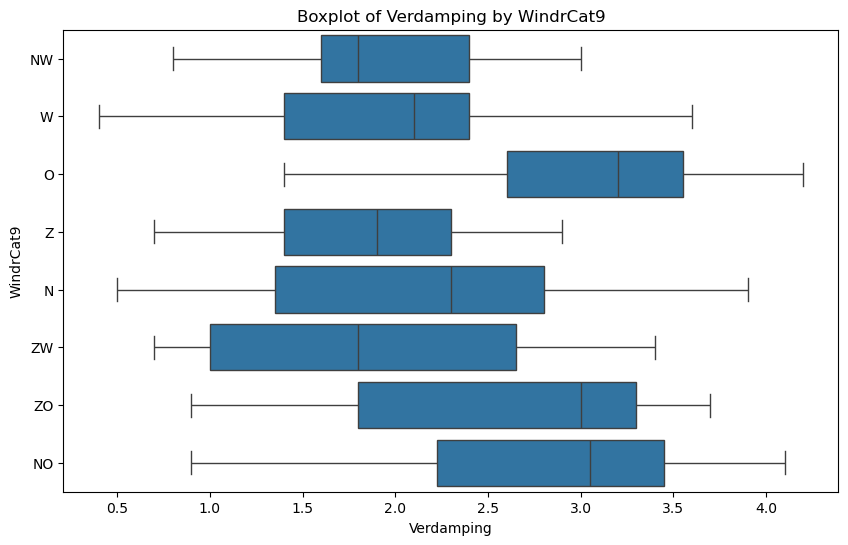

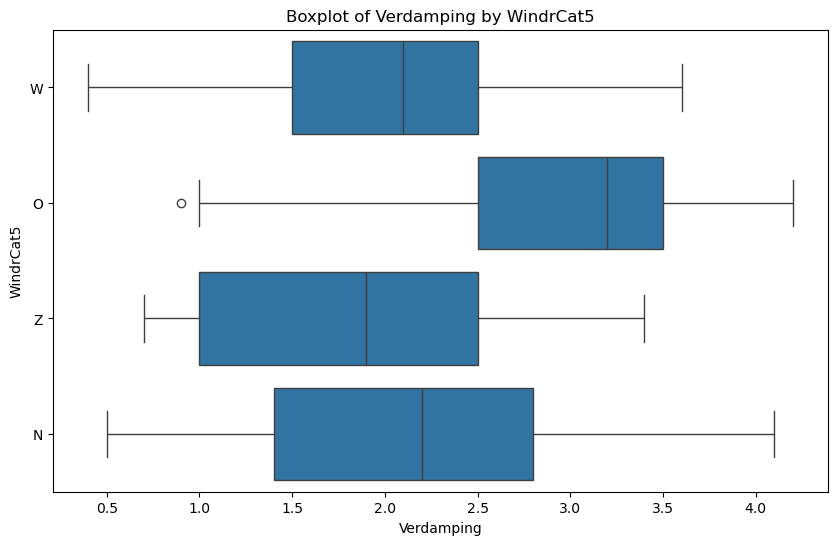

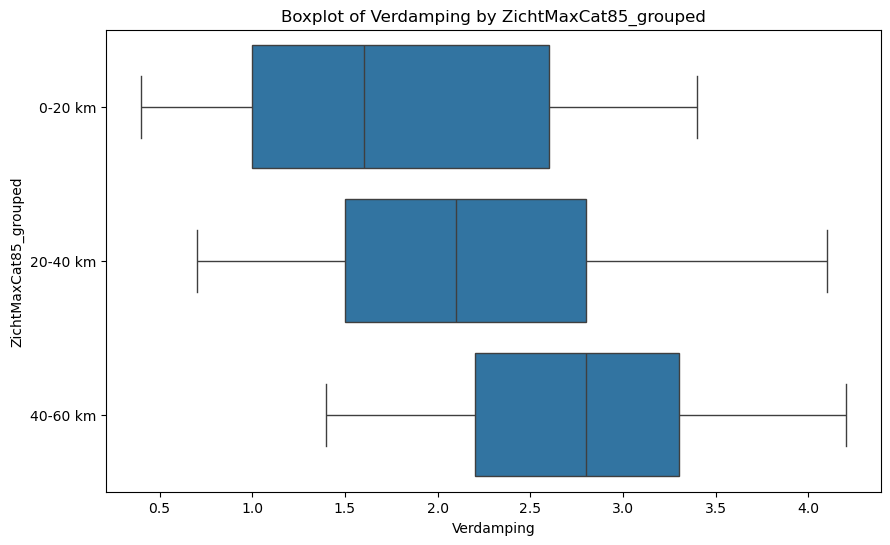

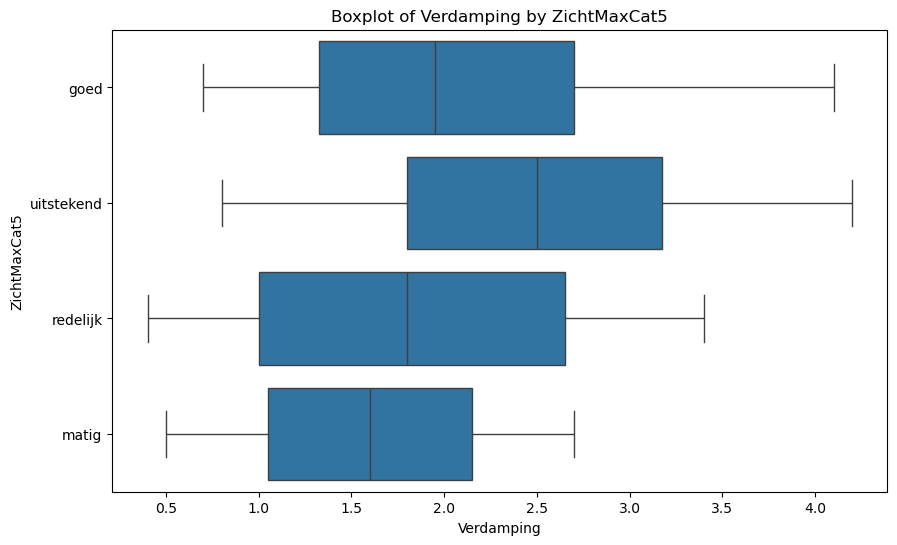

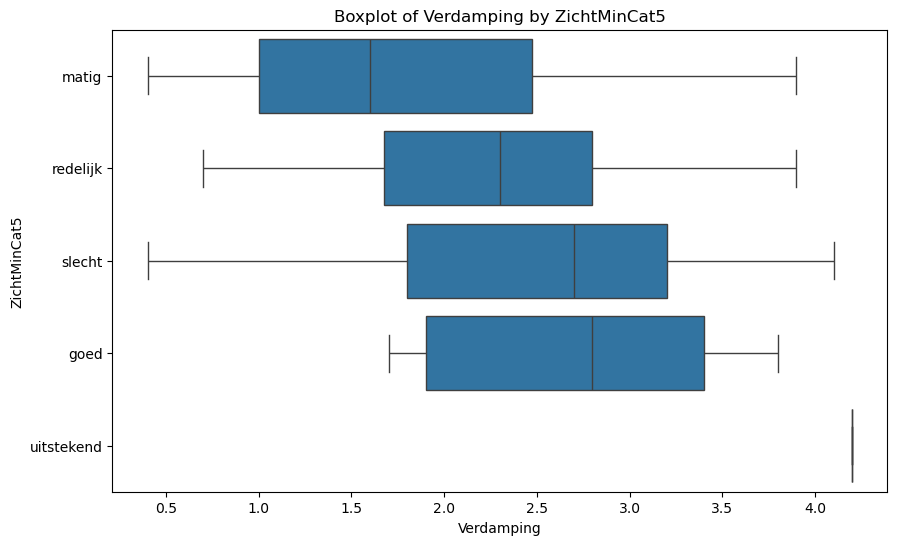

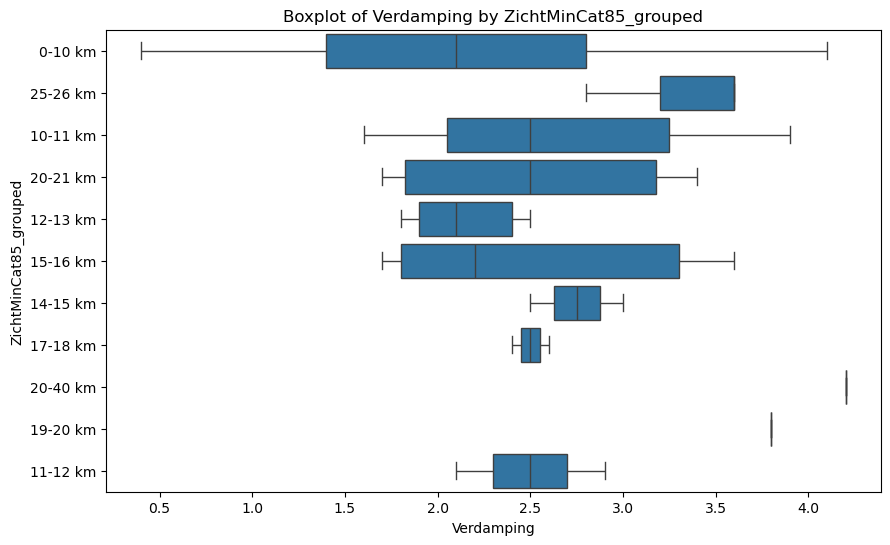

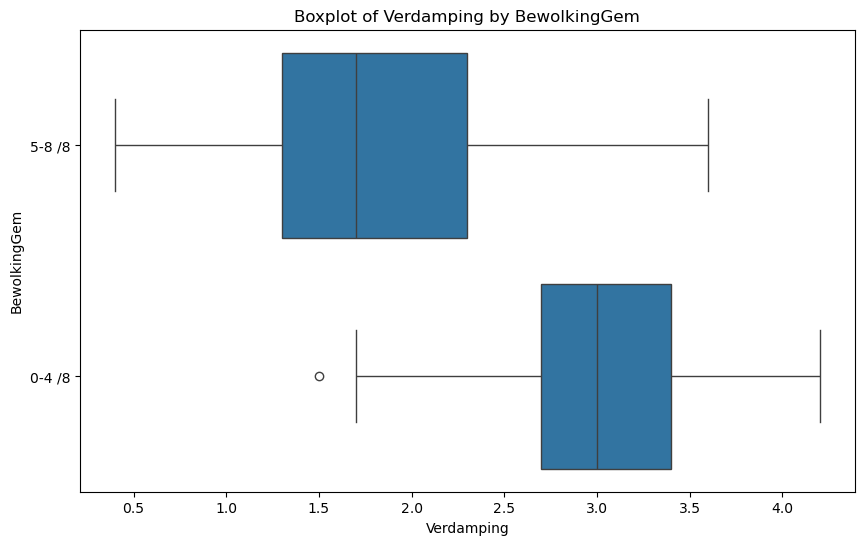

In [118]:
#We hebben weer de boxplotten geplot om de verdeling van variabelen per categorie te bekijken. Deze boxplotten zien er overzichtelijker uit. 
categ_kolommen = ['WindrCat9', 'WindrCat5', 'ZichtMaxCat85_grouped', 'ZichtMaxCat5', 'ZichtMinCat5', 'ZichtMinCat85_grouped', 'BewolkingGem'] 
for kolom in categ_kolommen:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Verdamping'], y=df[kolom])
    plt.title(f'Boxplot of Verdamping by {kolom}')
    plt.xlabel('Verdamping')
    plt.ylabel(kolom)
    plt.show()  

Uit deze analyses komen naar voren dat de alle categorische variabelen mogelijk een invloed hebben op de verdamping. Verder komt uit de analyses naar voren dat de nummerieke variabelen: Vochtighgem, VochtighMin, Zonneschijn, ZonPerc, Straling, NeerslagDuur en TempMax impact hebben op de Verdamping.

<Axes: xlabel='VochtighGem', ylabel='Verdamping'>

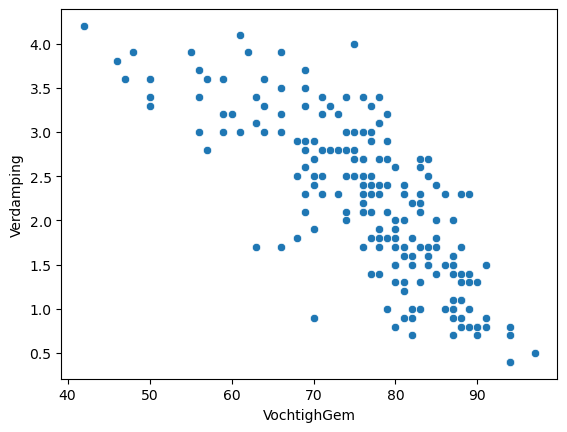

In [109]:
#Om het verband van de nummerieke variabelen met de gemiddelde cijfer verder te analyseren maken we scatterplots. 
sns.scatterplot(y=df.Verdamping, x=df.VochtighGem)   

<Axes: xlabel='VochtighMin', ylabel='Verdamping'>

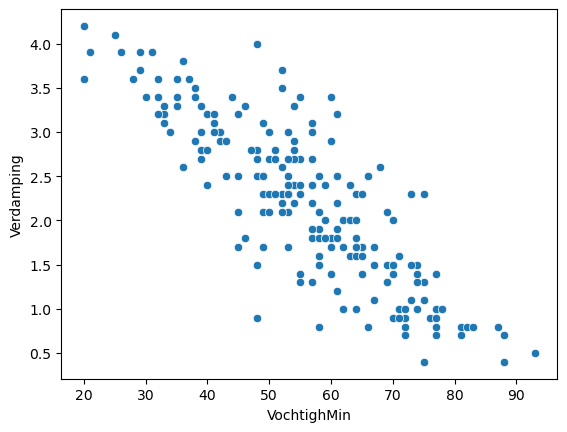

In [119]:
sns.scatterplot(y=df.Verdamping, x=df.VochtighMin)  

<Axes: xlabel='Zonneschijn', ylabel='Verdamping'>

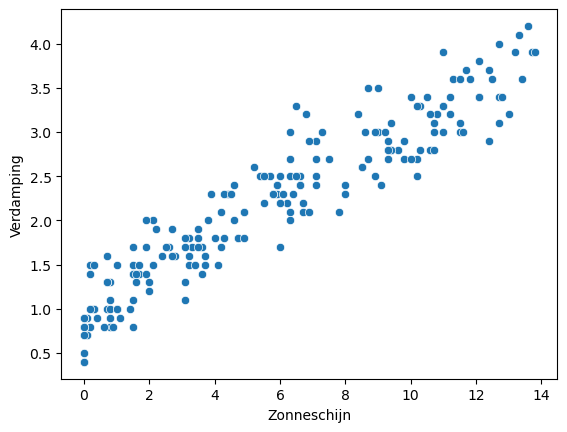

In [120]:
sns.scatterplot(y=df.Verdamping, x=df.Zonneschijn)  

<Axes: xlabel='ZonneschijnPerc', ylabel='Verdamping'>

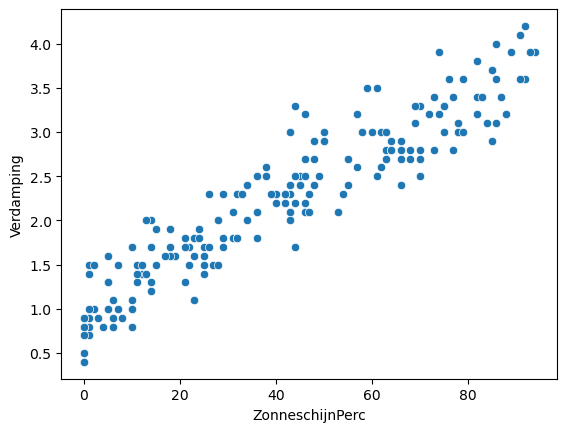

In [121]:
sns.scatterplot(y=df.Verdamping, x=df.ZonneschijnPerc)  

<Axes: xlabel='Straling', ylabel='Verdamping'>

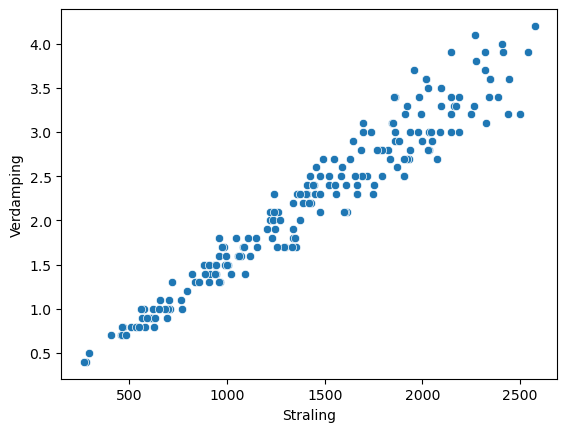

In [122]:
sns.scatterplot(y=df.Verdamping, x=df.Straling)  

<Axes: xlabel='TempMax', ylabel='Verdamping'>

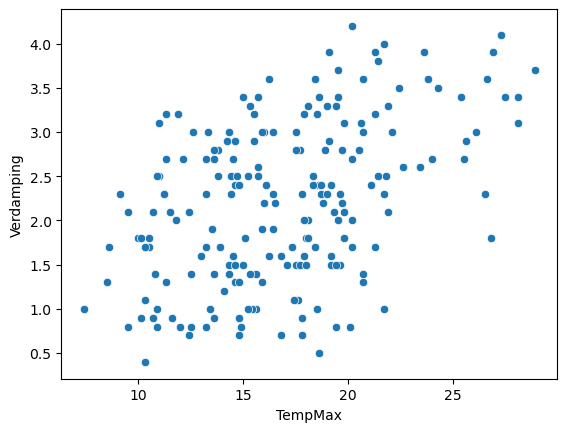

In [123]:
sns.scatterplot(y=df.Verdamping, x=df.TempMax)  

<Axes: xlabel='NeerslagDuur', ylabel='Verdamping'>

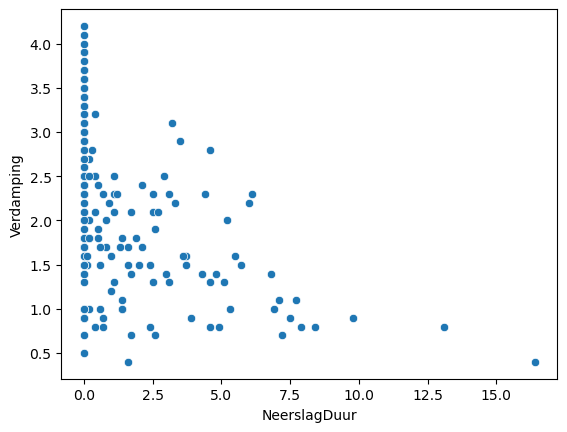

In [124]:
sns.scatterplot(y=df.Verdamping, x=df.NeerslagDuur)  

Uit de plots, die zijn gemaakt, blijkt er een lineair verband te zijn tussen de verdamping en Vochtighgem, VochtighMin, Zonneschijn, ZonPerc, Straling en TempMax. Dit gaan we verder testen met een lineair regressiemodel. 

We maken dummy variabelen van de categorische variabelen om de gegevens te kunnen verwerken in het model, die we gaan opstellen:

In [112]:
df['WindrCat9_NW'] = df['WindrCat9'].map({'NW': 1, 'W': 0, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':0})  #Dummy variabelen maken van de kolom WindrCat9
df['WindrCat9_W'] = df['WindrCat9'].map({'NW': 0, 'W': 1, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':0}) 
df['WindrCat9_NO'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':1, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':0})  
df['WindrCat9_ZO'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':0, 'ZO':1, 'O': 0, 'Z': 0, 'N':0, 'ZW':0})   
df['WindrCat9_O'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':0, 'ZO':0, 'O': 1, 'Z': 0, 'N':0, 'ZW':0})   
df['WindrCat9_Z'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':0, 'ZO':0, 'O': 0, 'Z': 1, 'N':0, 'ZW':0})  
df['WindrCat9_N'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':1, 'ZW':0})   
df['WindrCat9_ZW'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':1})   
  
df['WindrCat5_W'] = df['WindrCat5'].map({'W': 1, 'O': 0, 'Z': 0, 'N':0}) # Dummy variabelen maken van de kolom WindrCat5
df['WindrCat5_O'] = df['WindrCat5'].map({'W': 0, 'O': 1, 'Z': 0, 'N':0}) 
df['WindrCat5_Z'] = df['WindrCat5'].map({'W': 0, 'O': 0, 'Z': 1, 'N':0})
df['WindrCat5_N'] = df['WindrCat5'].map({'W': 0, 'O': 0, 'Z': 0, 'N':1}) 

df['ZichtMaxCat85_0_20'] = df['ZichtMaxCat85_grouped'].map({'0-20 km': 1, '20-40 km': 0, '40-60 km': 0, '4500-4600 m':0}) #Dummy variabelen maken van de kolom ZichtMaxCat85
df['ZichtMaxCat85d_20_40'] = df['ZichtMaxCat85_grouped'].map({'0-20 km': 0, '20-40 km': 1, '40-60 km': 0, '4500-4600 m':0}) 
df['ZichtMaxCat85_40_60'] = df['ZichtMaxCat85_grouped'].map({'0-20 km': 0, '20-40 km': 0, '40-60 km': 1, '4500-4600 m':0})   
df['ZichtMaxCat85_4500_4600'] = df['ZichtMaxCat85_grouped'].map({'0-20 km': 0, '20-40 km': 0, '40-60 km': 0, '4500-4600 m':1})  

df['ZichtMinCat85_0_10'] = df['ZichtMinCat85_grouped'].map({'0-10 km': 1, '10-20 km': 0, '20-40 km': 0})   #Dummy variabelen maken voor de kolom ZichtMinCat85
df['ZichtMinCat85_10_20'] = df['ZichtMinCat85_grouped'].map({'0-10 km': 0, '10-20 km': 1, '20-40 km': 0}) 
df['ZichtMinCat85_20_40'] = df['ZichtMinCat85_grouped'].map({'0-10 km': 0, '10-20 km': 0, '20-40 km': 1})   

df['BewolkingGem_kl'] = df['BewolkingGem'].map({'0-4 /8': 1, '5-8 /8': 0}) #Dummy variabelen maken voor de kolom BevolkingGem
df['BewolkingGem_gr'] = df['BewolkingGem'].map({'0-4 /8': 0, '5-8 /8': 1}) 

df['ZichtMinCat5_m'] = df['ZichtMinCat5'].map({'matig': 1, 'redelijk': 0, 'slecht': 0, 'goed': 0, 'uitstekend': 0})  #Dummy variabelen maken voor de kolom ZichtMinCat5
df['ZichtMinCat5_r'] = df['ZichtMinCat5'].map({'matig': 0, 'redelijk': 1, 'slecht': 0, 'goed': 0, 'uitstekend': 0})
df['ZichtMinCat5_s'] = df['ZichtMinCat5'].map({'matig': 0, 'redelijk': 0, 'slecht': 1, 'goed': 0, 'uitstekend': 0})
df['ZichtMinCat5_g'] = df['ZichtMinCat5'].map({'matig': 0, 'redelijk': 0, 'slecht': 0, 'goed': 1, 'uitstekend': 0})
df['ZichtMinCat5_u'] = df['ZichtMinCat5'].map({'matig': 0, 'redelijk': 0, 'slecht': 0, 'goed': 0, 'uitstekend': 1})

df['ZichtMaxCat5_m'] = df['ZichtMaxCat5'].map({'matig': 1, 'redelijk': 0, 'goed': 0, 'uitstekend': 0}) #Dummy variabelen maken voor de kolom ZichtMaxCat5
df['ZichtMaxCat5_r'] = df['ZichtMaxCat5'].map({'matig': 0, 'redelijk': 1, 'goed': 0, 'uitstekend': 0})
df['ZichtMaxCat5_g'] = df['ZichtMaxCat5'].map({'matig': 0, 'redelijk': 0, 'goed': 1, 'uitstekend': 0})
df['ZichtMaxCat5_u'] = df['ZichtMaxCat5'].map({'matig': 0, 'redelijk': 0, 'goed': 0, 'uitstekend': 1}) 



/tmp/ipykernel_2736158/1067098174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindrCat9_NW'] = df['WindrCat9'].map({'NW': 1, 'W': 0, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':0})  #Dummy variabelen maken van de kolom WindrCat9
/tmp/ipykernel_2736158/1067098174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindrCat9_W'] = df['WindrCat9'].map({'NW': 0, 'W': 1, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':0})
/tmp/ipykernel_2736158/1067098174.py:3: SettingWithCopyWarning: 
A value is try

In [73]:
# We gaan schattingen doen

# We stellen een model op met OLS. 
model = smf.ols('Verdamping~ VochtighGem + Straling + TempMax', data=df)

# Hierbij schatten we het model
regres = model.fit()

# We printen de samenvatting van de regressieresultaten. 
print(regres.summary())

                            OLS Regression Results                            
Dep. Variable:             Verdamping   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     7081.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          2.67e-200
Time:                        14:22:10   Log-Likelihood:                 206.19
No. Observations:                 201   AIC:                            -404.4
Df Residuals:                     197   BIC:                            -391.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3710      0.099     -3.731      

We hebben een aantal linieare regressie modellen opgesteld, bijv. met categorische variabelen en de nummerieke variabelen: vochtighmin, zonneschijn, zonpercentage, neerslagduur. De modellen bleken niet te voldoen aan de voorwaarden van de residuen om statistisch valide te zijn. Zo voldeed een model niet aan de voorwaarde multicollineariteit, omdat de variabelen: vochtighGem, zonneschijnPerc, vochtighMin en straling een te hoge VIF-waarde hadden. We hebben meerdere modellen opgesteld (zie bijlagen) en gevalueerd om het meest statistisch valide model te vinden om het gemiddelde cijfer aan het einde van jaar 1 te verklaren. Hierboven is onze  meest mogelijke statisch valide model te zien.

Hieronder gaan we door middel van verschillende testen toetsen of ons model statisch valide is. 

Hierbij wordt er gekeken naar de volgende voorwaarden: 
- normaliteit 
- centraliteit 
- homoscedasticiteit 
- multicollineariteit 

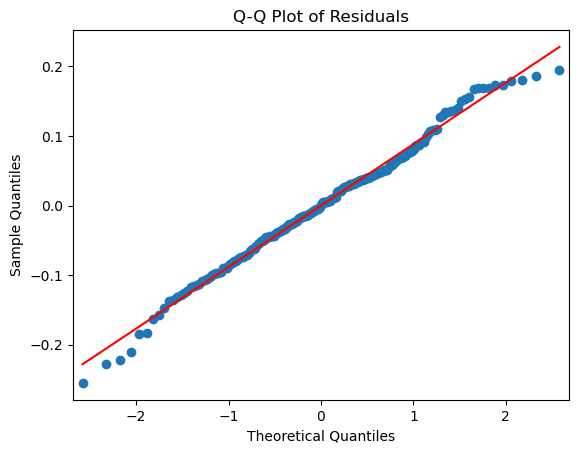

Shapiro-Wilk statistic 0.9915, p-value: 0.2866
t-test statistic for central tendency -0.0000 p-value: 1.0000


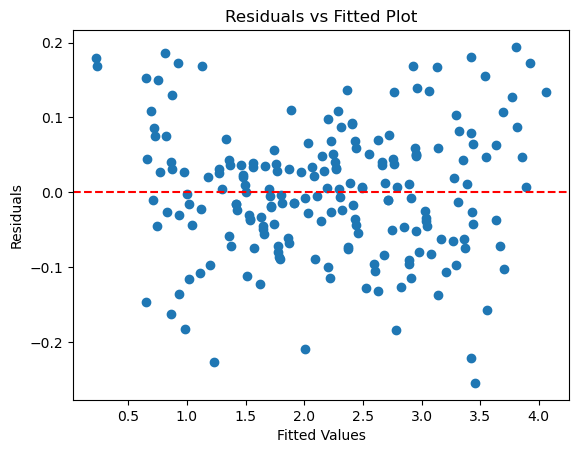

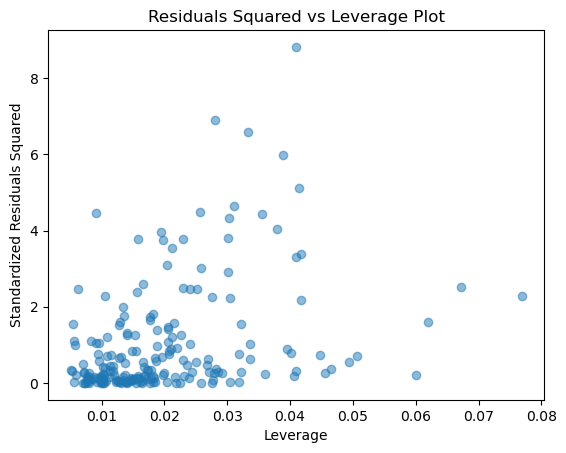

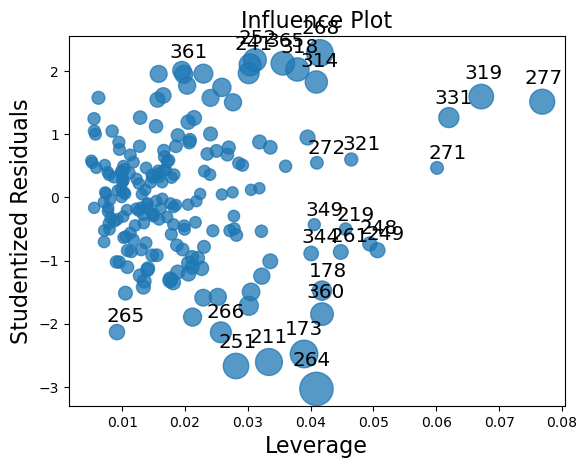

Breusch-Pagan statistic: 0.6271, p-value=0.8902
VIF values:
Intercept : 258.9201110579013
VochtighGem : 2.7804001619802623
Straling : 2.861751794276372
TempMax : 1.0636554168784857


In [127]:
# Q-Q plotten om de normaliteit te toetsen
sm.qqplot(regres.resid, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test om de normaliteit te toetsen
shapiro_test = stats.shapiro(regres.resid)
print("Shapiro-Wilk statistic {:.4f}, p-value: {:.4f}".format(shapiro_test.statistic, shapiro_test.pvalue))
    
# Toets om de centraliteit te toetsen 
t_test = stats.ttest_1samp(regres.resid, 0)
print("t-test statistic for central tendency {:.4f} p-value: {:.4f}".format(t_test.statistic, t_test.pvalue))

# Residuals vs Fitted plotten om de centraliteit te toetsen 
plt.scatter(regres.fittedvalues, regres.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Leverage vs Residuals squared plotten om de homoscedasticiteit te toetsen 
influence = regres.get_influence()
leverage = influence.hat_matrix_diag
resid_stud = influence.resid_studentized_internal

plt.scatter(leverage, resid_stud**2, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals Squared')
plt.title('Residuals Squared vs Leverage Plot')
plt.show()

sm.graphics.influence_plot(regres, size=24, criterion="cooks") 
plt.show()

# Breusch Pagan toets om de homoscedasticiteit te toetsen
brpg = sms.het_breuschpagan(regres.resid, model.exog)
print('Breusch-Pagan statistic: {:.4f}, p-value={:.4f}'.format(brpg[0],brpg[1]))

# Check om multicollineariteit te toetsen
X = pd.DataFrame(model.exog,columns=model.exog_names)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF values:")
for i, col in enumerate(X.columns):
    print(col, ":", vif[i])

**Conclusie:** Het lineair regressiemodel, die we hebben opgesteld, toont de grootste gelijkenis met een statistisch valide model waarmee verdamping uitgedrukt kan worden in termen van de andere variabelen in de dataset, omdat: 

- Het model een adjusted R-kwadraatwaarde van 0.991 aantoont, dit houd in dat ongeveer 80.1% van de variantie in de verdamping wordt verklaard door de voorspellende variabelen.                                                      
- De F-statistiek een waarde van (p < 0.05) aantoont, wat inhoud dat het model als geheel statistisch significant is.
- Alle voorspellende variabelen (VochtighGem, Straling en TempMax) een waarde van (p < 0.05) geven, wat aangeeft dat ze elk een statistisch significant effect hebben op het gemiddelde eindcijfer.
- De Shapiro-Wilk-test voor normaliteit een niet-significante p-waarde van 0.2866 aangeeft, wat suggereert dat de residuen normaal verdeeld zijn.
- De t-test voor de centrale neiging een niet-significante p-waarde van 1.0000 aantoont, wat inhoudt dat er geen significant verschil is tussen de gemiddelde residuen en nul.
- De Breusch-Pagan-test resulteert in een niet-significante p-waarde van 0.8902, wat aangeeft dat er geen significant heteroscedasticiteit is in de residuen.
- De VIF waarden zijn allemaal redelijk laag met waarden onder 5, wat aangeeft dat multicollineariteit geen significant probleem is in het model.